In [512]:
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import circos, CircosPlot
import nxviz as nv
from nxviz import annotate
from typing import List, Tuple

In [513]:
import json

reader = open('faculty_major.json')
data = json.load(reader)
reader.close()

majors = {}

for each in data:
    majs = each["majors"]

    for major in majs:
        majors[str(major["code"])] = major["acronym"]

In [514]:
reader = open('weight_normalized.txt')
raw = reader.read().split('\n')
reader.close()

data: List[Tuple[str,str,float]] = []

nodes = set()

for each in raw:
    splitted = each.split(' ')
    nodes.add(splitted[0])
    nodes.add(splitted[1])
    data.append((splitted[0], splitted[1], float(splitted[2])))

nodes = list(nodes)
nodes.sort()
data.sort()
print(nodes)
# import csv

# with open('nodes.csv', 'w') as w:
#     cw = csv.writer(w)
#     cw.writerow(["node", "faculty", "major"])
#     cw.writerows([[x, x.split('-')[0], x.split('-')[1]] for x in list(nodes)])

# with open('weight.csv', 'w') as w:
#     cw = csv.writer(w)
#     cw.writerow(['node_a', 'node_b', 'weight'])
#     cw.writerows([list(x) for x in data])

['FITB-120', 'FITB-128', 'FITB-129', 'FITB-151', 'FMIPA-101', 'FMIPA-102', 'FMIPA-103', 'FMIPA-105', 'FMIPA-108', 'FSRD-170', 'FSRD-172', 'FSRD-173', 'FSRD-174', 'FSRD-175', 'FTI-130', 'FTI-133', 'FTI-134', 'FTI-143', 'FTI-144', 'FTI-145', 'FTMD-131', 'FTMD-136', 'FTMD-137', 'FTSL-150', 'FTSL-153', 'FTSL-155', 'FTSL-157', 'FTSL-158', 'FTTM-121', 'FTTM-122', 'FTTM-123', 'FTTM-125', 'SAPPK-152', 'SAPPK-154', 'SBM-190', 'SBM-192', 'SF-107', 'SF-116', 'SITH-104', 'SITH-106', 'SITH-112', 'SITH-114', 'SITH-115', 'SITH-119', 'STEI-132', 'STEI-135', 'STEI-180', 'STEI-181', 'STEI-182', 'STEI-183']


In [515]:
G = nx.Graph(name="Major Similarity Graph")

for node in nodes:
    splt = node.split('-')
    major = majors[splt[1]]

    G.add_node(major, faculty=splt[0], major=major)

for i in range(len(data)):
    a, b, w = data[i]

    a_major = majors[a.split('-')[1]]
    b_major = majors[b.split('-')[1]]
    w = w/10

    if w > 9:
        G.add_edge(a_major,b_major, weight=w/2)
        # G.add_weighted_edges_from([(a,b,w)])

# for n, d in G.nodes(data=True):
#     G.nodes[n]["faculty"] = n.split("-")[0]

/home/barcode/.local/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<class 'nxviz.api.CircosPlot'>


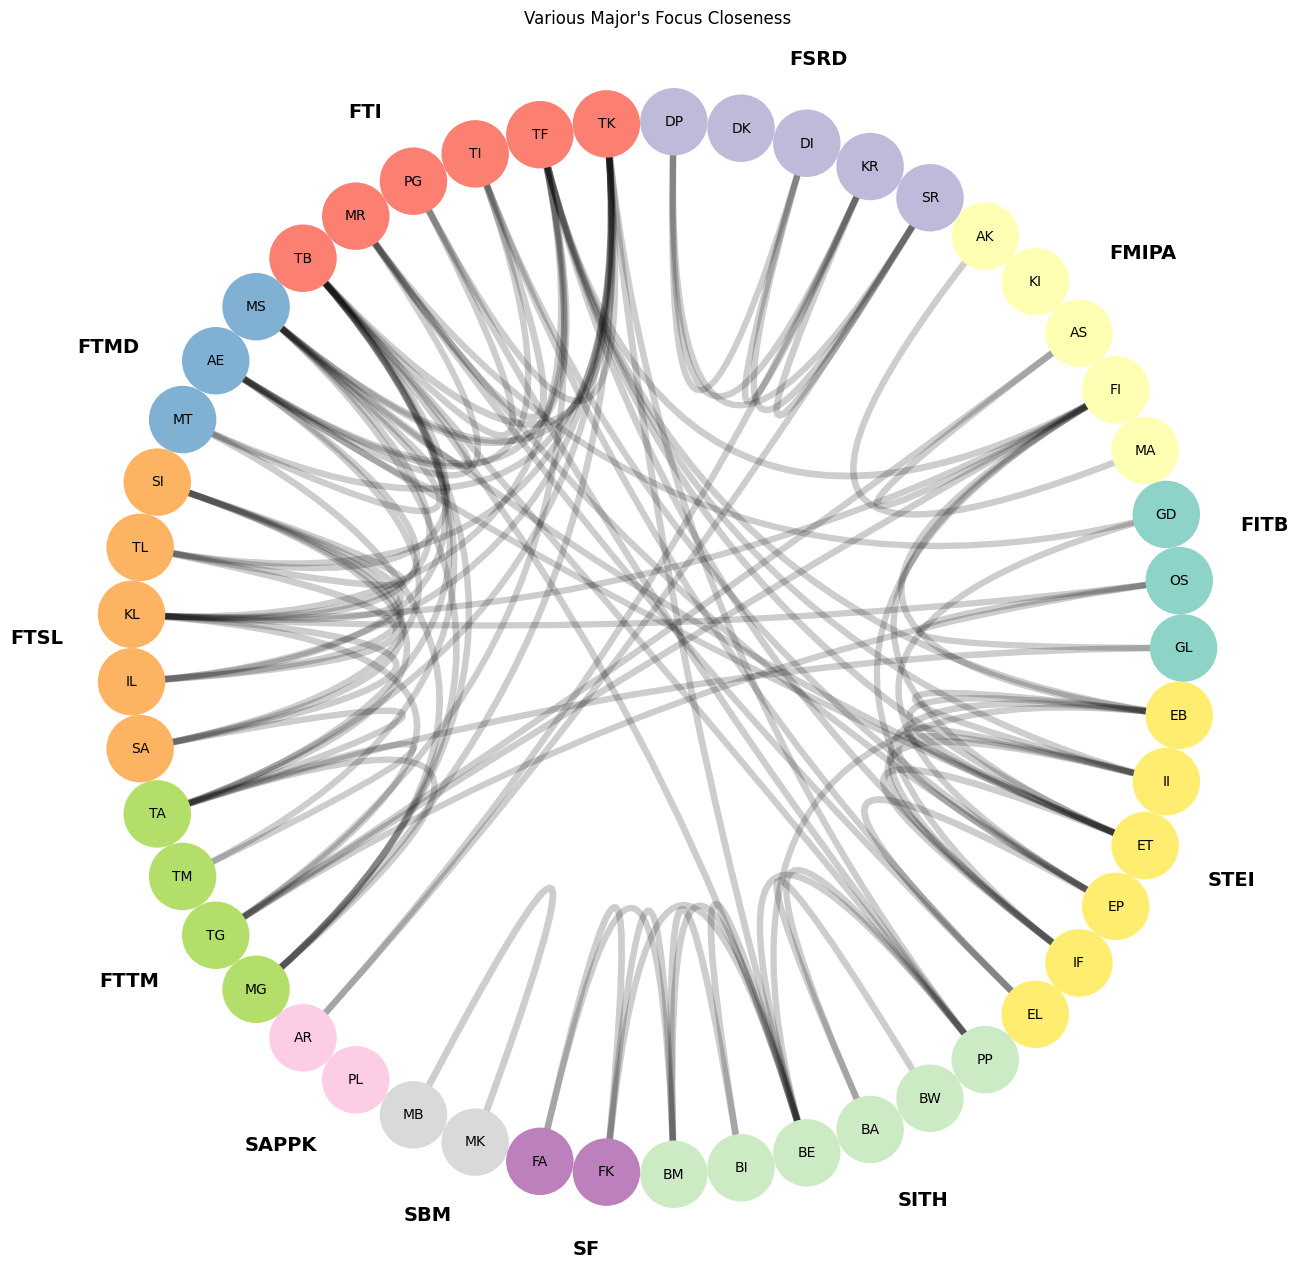

In [516]:
from matplotlib.axes import Axes

# plt.figure(figsize=(16,16))
plt.rcParams['figure.figsize'] = (16,16)

# c:Axes  = circos(G, node_color_by='faculty', group_by="faculty", edge_lw_by="weight")

c = CircosPlot(G, 
    node_color='faculty', 
    node_grouping="faculty", 
    edge_width="weight",
    # edge_color="coler"
    )
# c.ax.
print(type(c))

# import nv.api.
annotate.circos_labels(G)
annotate.circos_group(G, group_by="faculty", fontdict={"size": 14, "weight": "bold"}, radius_offset=2)
# annotate.circos_group(G, group_by="major", midpoint=False, radius=15.5, fontdict={"size": 12})

# nv.annotate.circos_group(G, group_by="faculty")
# G.ann
# plt.
# plt.tight_layout()
# plt.autoscale()
# plt.title("Various Major's Focus Closeness")
plt.show()